# Automatic atom mapping - example

This notebook demonstrates how the `atom_mapping` module works in practice and how to load a COBRA model into the INCA wrapper. It's purpose is to reduce the workload when preparing input data for MFA analysis on INCA. 

The only input required is the COBRA model that contains all reaction data, and, most importantly, references for metabolite structures in KEGG Compound, HMDB, CHEBI databases, or an InChI key.

This module uses RDKit to generate the input for RDT (Reaction Decoder Tool), a tool to estimate the atom mapping of a reaction. The output of RDT is then parsed and used to generate a dictionary of atom mappings for each reaction in the model.

The following figure illustrates the process from a metabolic model to an atom-mapped model.

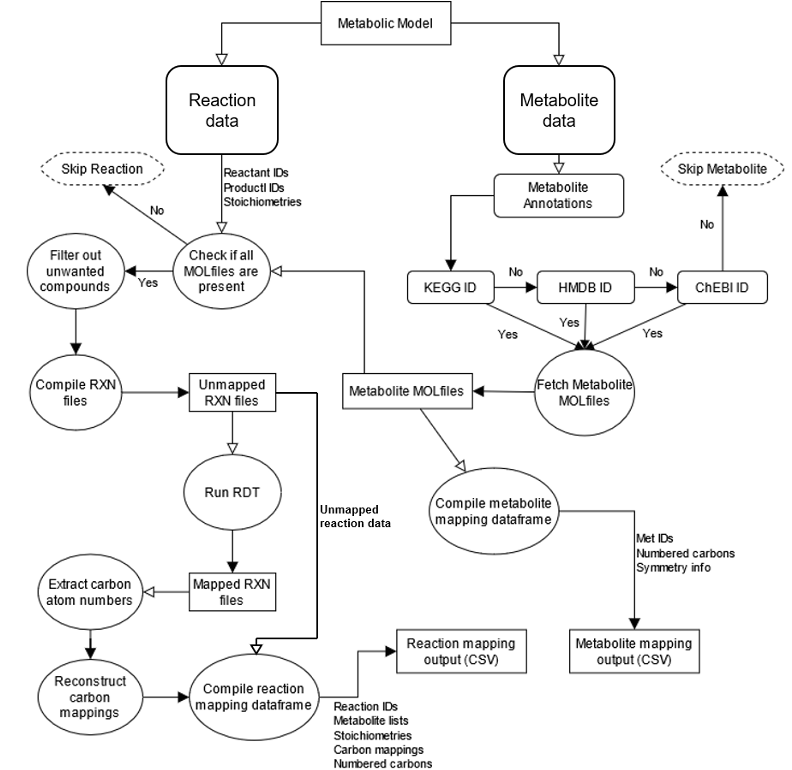

#### First, import required modules:

In [1]:
import pandas as pd
from incawrapper.atommapping import atom_mapping
from cobra.io import load_model

## Overview
#### 1. create a dataframe with the metabolites
- df that has met_id and annoations as columns

In [2]:
model = load_model("textbook")
 
met_df = pd.DataFrame(
    {
        "met_id": [met.id for met in model.metabolites],
        "annotations": [met.annotation for met in model.metabolites],
    }
)
print(met_df.head())

Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-05
    met_id                                        annotations
0  13dpg_c  {'bigg.metabolite': '13dpg', 'biocyc': 'DPG', ...
1    2pg_c  {'bigg.metabolite': '2pg', 'biocyc': '2-PG', '...
2    3pg_c  {'bigg.metabolite': '3pg', 'biocyc': 'G3P', 'c...
3   6pgc_c  {'bigg.metabolite': '6pgc', 'biocyc': 'CPD-296...
4   6pgl_c  {'bigg.metabolite': '6pgl', 'biocyc': 'D-6-P-G...


#### 2. create a dataframe with the reactions
- df that has rxn_id and annotations as columns
- the information is taken from the model

In [3]:
# Examples
reaction_data_temp = {}
for cnt, r in enumerate(model.reactions):
    reaction_data_dict = {
        "rxn_id": r.id,
        "equation": r.build_reaction_string(),
        "reactants_stoichiometry": [
            r.get_coefficient(react.id) for react in r.reactants
        ],
        "reactants_ids": [react.id for react in r.reactants],
        "products_stoichiometry": [
            r.get_coefficient(prod.id) for prod in r.products
        ],
        "products_ids": [prod.id for prod in r.products],
    }
    reaction_data_temp[cnt] = reaction_data_dict
 
rxn_data = pd.DataFrame.from_dict(reaction_data_temp, orient='index')
rxn_data.head()

,rxn_id,equation,reactants_stoichiometry,reactants_ids,products_stoichiometry,products_ids
0,ACALD,acald_c + coa_c + nad_c <=> accoa_c + h_c + na...,"[-1.0, -1.0, -1.0]","[acald_c, coa_c, nad_c]","[1.0, 1.0, 1.0]","[accoa_c, h_c, nadh_c]"
1,ACALDt,acald_e <=> acald_c,[-1.0],[acald_e],[1.0],[acald_c]
2,ACKr,ac_c + atp_c <=> actp_c + adp_c,"[-1.0, -1.0]","[ac_c, atp_c]","[1.0, 1.0]","[actp_c, adp_c]"
3,ACONTa,cit_c <=> acon_C_c + h2o_c,[-1.0],[cit_c],"[1.0, 1.0]","[acon_C_c, h2o_c]"
4,ACONTb,acon_C_c + h2o_c <=> icit_c,"[-1.0, -1.0]","[acon_C_c, h2o_c]",[1.0],[icit_c]


#### 3. create a MolfileDownloader object
- calling the generate_molfile_database method triggers the download of the molfiles for the metabolites in the dataframe

In [4]:
base_path = "data/storage/path"
downloader = atom_mapping.MolfileDownloader(met_df, base_path=base_path)
downloader.generate_molfile_database()

Fetching metabolite structures...
Successfully fetched 60/72 metabolites


#### 4. Write reactions in the correct format for RDT (write_rxn_file)

In [5]:
atom_mapping.write_rxn_files(rxn_data, base_path=base_path)

Metabolite structures missing for reaction ACONTa
Metabolite structures missing for reaction ACONTb
Excluded Biomass_Ecoli_core reaction from mapping
Metabolite structures missing for reaction D_LACt2
Metabolite structures missing for reaction EX_glc__D_e
Metabolite structures missing for reaction EX_gln__L_e
Metabolite structures missing for reaction EX_glu__L_e
Metabolite structures missing for reaction EX_lac__D_e
Metabolite structures missing for reaction EX_mal__L_e
Metabolite structures missing for reaction FUM
Metabolite structures missing for reaction GLCpts
Metabolite structures missing for reaction GLNS
Metabolite structures missing for reaction GLNabc
Metabolite structures missing for reaction GLUDy
Metabolite structures missing for reaction GLUN
Metabolite structures missing for reaction GLUSy
Metabolite structures missing for reaction GLUt2r
Metabolite structures missing for reaction GND
Metabolite structures missing for reaction LDH_D
Metabolite structures missing for rea

#### 5. Query RDT for the atom mapping (obtain_atom_mappings)
- This might take a while
- Can be skipped if you already have the atom mappings

In [6]:
atom_mapping.obtain_atom_mappings(max_time=20, base_path=base_path)

openjdk version "11.0.9.1" 2020-11-04 LTS
OpenJDK Runtime Environment Zulu11.43+55-CA (build 11.0.9.1+1-LTS)
OpenJDK 64-Bit Server VM Zulu11.43+55-CA (build 11.0.9.1+1-LTS, mixed mode)


Mapping reactions...
['PPC.rxn', 'EX_akg_e.rxn', 'THD2.rxn', 'EX_h2o_e.rxn', 'PGK.rxn', 'EX_for_e.rxn', 'PGI.rxn', 'EX_fum_e.rxn', 'ALCD2x.rxn', 'EX_o2_e.rxn', 'CS.rxn', 'ATPM.rxn', 'ACt2r.rxn', 'PFL.rxn', 'PGL.rxn', 'NADH16.rxn', 'O2t.rxn', 'TALA.rxn', 'FORt2.rxn', 'PPS.rxn', 'PGM.rxn', 'PFK.rxn', 'CYTBD.rxn', 'FRD7.rxn', 'PYRt2.rxn', 'ICDHyr.rxn', 'H2Ot.rxn', 'ACALD.rxn', 'FRUpts2.rxn', 'FUMt2_2.rxn', 'GAPD.rxn', 'ENO.rxn', 'NH4t.rxn', 'AKGDH.rxn', 'SUCOAS.rxn', 'PYK.rxn', 'ATPS4r.rxn', 'EX_pyr_e.rxn', 'SUCCt2_2.rxn', 'G6PDH2r.rxn', 'ACALDt.rxn', 'PIt2r.rxn', 'SUCCt3.rxn', 'ADK1.rxn', 'EX_fru_e.rxn', 'SUCDi.rxn', 'ICL.rxn', 'PPCK.rxn', 'ETOHt2r.rxn', 'PTAr.rxn', 'NADTRHD.rxn', 'AKGt2r.rxn', 'EX_ac_e.rxn', 'EX_succ_e.rxn', 'EX_h_e.rxn', 'EX_co2_e.rxn', 'FORti.rxn', 'FBA.rxn', 'CO2t.rxn', 'EX_etoh_e.rxn', 'EX_acald_e.rxn', 'EX_pi_e.rxn', 'TPI.rxn', 'PDH.rxn', 'EX_nh4_e.rxn', 'FBP.rxn', 'ACKr.rxn']
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Au

uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Number of atom(s) on the Left side 14 =/= Number of atom(s) on the Right side 20
uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: {C=4, O=9, P=1} =/= {C=4, Ca=1, O=13, P=2}
uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Unmapped atoms present in this reaction(MIN) algorithm.


0    [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading global configuration
7    [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading defaults: jar:file:/Users/krv114/Documents/GitHub/incawrapper/RDT.jar!/META-INF/jnati/jnati.default-properties
9    [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading artefact configuration: jniinchi-1.03_1
12   [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading instance defaults: jar:file:/Users/krv114/Documents/GitHub/incawrapper/RDT.jar!/META-INF/jnati/jnati.instance.default-properties
14   [main] INFO  net.sf.jnati.deploy.repository.ClasspathRepository  - Searching classpath for: jniinchi-1.03_1-MAC-X86_64
15   [main] INFO  net.sf.jnati.deploy.repository.LocalRepository  - Searching local repository for: jniinchi-1.03_1-MAC-X86_64
15   [main] DEBUG net.sf.jnati.deploy.repository.LocalRepository  - Artefact path: /Users/krv114/.jnati/repo/jniinchi/1.03_1/MAC-X86_64
20   [main] INFO  net.sf

uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Unmapped atoms present in this reaction(MAX) algorithm.
uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Unmapped atoms present in this reaction(MIXTURE) algorithm.


Mapped RXN File /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_PPC_AAM.rxn


Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_PPC_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_PPC_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
Mapped RXN File /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_EX_akg_e_AAM.rxn


Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_EX_akg_e_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_EX_akg_e_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 

Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_EX_h2o_e_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_EX_h2o_e_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
0    [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading global configuration
9    [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading defaults: jar:file:/Users/krv114/Documents/GitH

Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_PGK_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_PGK_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
Mapped RXN File /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_EX_for_e_AAM.rxn


Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_EX_for_e_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_EX_for_e_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
0    [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading global configuration
10   [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading defaults: jar:file:/Users/krv114/Documents/GitH

Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_PGI_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_PGI_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
Mapped RXN File /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_EX_fum_e_AAM.rxn


Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_EX_fum_e_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_EX_fum_e_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
0    [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading global configuration
7    [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading defaults: jar:file:/Users/krv114/Documents/GitH

uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Unmapped atoms present in this reaction(MAX) algorithm.
uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Unmapped atoms present in this reaction(MIXTURE) algorithm.


Mapped RXN File /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_ALCD2x_AAM.rxn


Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_ALCD2x_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_ALCD2x_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
Mapped RXN File /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_EX_o2_e_AAM.rxn


Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_EX_o2_e_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_EX_o2_e_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
0    [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading global configuration
12   [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading defaults: jar:file:/Users/krv114/Documents/GitHub

Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_CS_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_CS_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --


uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Number of atom(s) on the Left side 32 =/= Number of atom(s) on the Right side 38
uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: {C=10, N=5, O=14, P=3} =/= {C=10, Ca=1, N=5, O=18, P=4}
uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Unmapped atoms present in this reaction(MIN) algorithm.


0    [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading global configuration
11   [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading defaults: jar:file:/Users/krv114/Documents/GitHub/incawrapper/RDT.jar!/META-INF/jnati/jnati.default-properties
12   [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading artefact configuration: jniinchi-1.03_1
15   [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading instance defaults: jar:file:/Users/krv114/Documents/GitHub/incawrapper/RDT.jar!/META-INF/jnati/jnati.instance.default-properties
17   [main] INFO  net.sf.jnati.deploy.repository.ClasspathRepository  - Searching classpath for: jniinchi-1.03_1-MAC-X86_64
18   [main] INFO  net.sf.jnati.deploy.repository.LocalRepository  - Searching local repository for: jniinchi-1.03_1-MAC-X86_64
18   [main] DEBUG net.sf.jnati.deploy.repository.LocalRepository  - Artefact path: /Users/krv114/.jnati/repo/jniinchi/1.03_1/MAC-X86_64
19   [main] INFO  net.sf

uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Unmapped atoms present in this reaction(MAX) algorithm.
uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Unmapped atoms present in this reaction(MIXTURE) algorithm.


Mapped RXN File /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_ATPM_AAM.rxn


Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_ATPM_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_ATPM_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
Mapped RXN File /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_ACt2r_AAM.rxn


Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_ACt2r_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_ACt2r_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --


uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Number of atom(s) on the Left side 54 =/= Number of atom(s) on the Right side 55
uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: {C=24, N=7, O=19, P=3, S=1} =/= {C=24, N=8, O=19, P=3, S=1}
uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Unmapped atoms present in this reaction(MIN) algorithm.


0    [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading global configuration
8    [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading defaults: jar:file:/Users/krv114/Documents/GitHub/incawrapper/RDT.jar!/META-INF/jnati/jnati.default-properties
9    [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading artefact configuration: jniinchi-1.03_1
12   [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading instance defaults: jar:file:/Users/krv114/Documents/GitHub/incawrapper/RDT.jar!/META-INF/jnati/jnati.instance.default-properties
14   [main] INFO  net.sf.jnati.deploy.repository.ClasspathRepository  - Searching classpath for: jniinchi-1.03_1-MAC-X86_64
15   [main] INFO  net.sf.jnati.deploy.repository.LocalRepository  - Searching local repository for: jniinchi-1.03_1-MAC-X86_64
15   [main] DEBUG net.sf.jnati.deploy.repository.LocalRepository  - Artefact path: /Users/krv114/.jnati/repo/jniinchi/1.03_1/MAC-X86_64
15   [main] INFO  net.sf

uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Unmapped atoms present in this reaction(MAX) algorithm.
uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Unmapped atoms present in this reaction(MIXTURE) algorithm.


Mapped RXN File /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_PFL_AAM.rxn


Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_PFL_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_PFL_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
0    [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading global configuration
12   [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading defaults: jar:file:/Users/krv114/Documents/GitHub/incawra

Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_PGL_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_PGL_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --


uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Number of atom(s) on the Left side 97 =/= Number of atom(s) on the Right side 60
uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: {C=70, N=7, O=18, P=2} =/= {C=36, N=7, O=15, P=2}


!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
Mapped RXN File /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_O2t_AAM.rxn


Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_O2t_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_O2t_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
0    [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading global configuration
8    [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading defaults: jar:file:/Users/krv114/Documents/GitHub/incawra

Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_TALA_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_TALA_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
Mapped RXN File /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_FORt2_AAM.rxn


Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_FORt2_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_FORt2_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --


uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Number of atom(s) on the Left side 38 =/= Number of atom(s) on the Right side 44
uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: {C=13, N=5, O=17, P=3} =/= {C=13, Ca=1, N=5, O=21, P=4}
uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Unmapped atoms present in this reaction(MIN) algorithm.


0    [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading global configuration
11   [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading defaults: jar:file:/Users/krv114/Documents/GitHub/incawrapper/RDT.jar!/META-INF/jnati/jnati.default-properties
12   [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading artefact configuration: jniinchi-1.03_1
14   [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading instance defaults: jar:file:/Users/krv114/Documents/GitHub/incawrapper/RDT.jar!/META-INF/jnati/jnati.instance.default-properties
17   [main] INFO  net.sf.jnati.deploy.repository.ClasspathRepository  - Searching classpath for: jniinchi-1.03_1-MAC-X86_64
18   [main] INFO  net.sf.jnati.deploy.repository.LocalRepository  - Searching local repository for: jniinchi-1.03_1-MAC-X86_64
18   [main] DEBUG net.sf.jnati.deploy.repository.LocalRepository  - Artefact path: /Users/krv114/.jnati/repo/jniinchi/1.03_1/MAC-X86_64
19   [main] INFO  net.sf

uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Unmapped atoms present in this reaction(MAX) algorithm.
uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Unmapped atoms present in this reaction(MIXTURE) algorithm.


Mapped RXN File /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_PPS_AAM.rxn


Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_PPS_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_PPS_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
0    [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading global configuration
9    [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading defaults: jar:file:/Users/krv114/Documents/GitHub/incawra

Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_PGM_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_PGM_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
0    [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading global configuration
11   [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading defaults: jar:file:/Users/krv114/Documents/GitHub/incawra

Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_PFK_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_PFK_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --


uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Number of atom(s) on the Left side 16 =/= Number of atom(s) on the Right side 54
uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: {C=15, O=1} =/= {C=49, O=5}
uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Unmapped atoms present in this reaction(MIN) algorithm.


0    [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading global configuration
12   [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading defaults: jar:file:/Users/krv114/Documents/GitHub/incawrapper/RDT.jar!/META-INF/jnati/jnati.default-properties
13   [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading artefact configuration: jniinchi-1.03_1
15   [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading instance defaults: jar:file:/Users/krv114/Documents/GitHub/incawrapper/RDT.jar!/META-INF/jnati/jnati.instance.default-properties
17   [main] INFO  net.sf.jnati.deploy.repository.ClasspathRepository  - Searching classpath for: jniinchi-1.03_1-MAC-X86_64
19   [main] INFO  net.sf.jnati.deploy.repository.LocalRepository  - Searching local repository for: jniinchi-1.03_1-MAC-X86_64
19   [main] DEBUG net.sf.jnati.deploy.repository.LocalRepository  - Artefact path: /Users/krv114/.jnati/repo/jniinchi/1.03_1/MAC-X86_64
19   [main] INFO  net.sf

uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Number of atom(s) on the Left side 24 =/= Number of atom(s) on the Right side 61
uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: {C=19, O=5} =/= {C=53, O=8}


!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
Mapped RXN File /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_PYRt2_AAM.rxn


Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_PYRt2_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_PYRt2_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --


uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Unmapped atoms present in this reaction(MIN) algorithm.


0    [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading global configuration
10   [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading defaults: jar:file:/Users/krv114/Documents/GitHub/incawrapper/RDT.jar!/META-INF/jnati/jnati.default-properties
12   [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading artefact configuration: jniinchi-1.03_1
15   [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading instance defaults: jar:file:/Users/krv114/Documents/GitHub/incawrapper/RDT.jar!/META-INF/jnati/jnati.instance.default-properties
17   [main] INFO  net.sf.jnati.deploy.repository.ClasspathRepository  - Searching classpath for: jniinchi-1.03_1-MAC-X86_64
18   [main] INFO  net.sf.jnati.deploy.repository.LocalRepository  - Searching local repository for: jniinchi-1.03_1-MAC-X86_64
18   [main] DEBUG net.sf.jnati.deploy.repository.LocalRepository  - Artefact path: /Users/krv114/.jnati/repo/jniinchi/1.03_1/MAC-X86_64
18   [main] INFO  net.sf

uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Unmapped atoms present in this reaction(MAX) algorithm.
uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Unmapped atoms present in this reaction(MIXTURE) algorithm.


Mapped RXN File /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_ICDHyr_AAM.rxn


Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_ICDHyr_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_ICDHyr_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
Mapped RXN File /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_H2Ot_AAM.rxn


Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_H2Ot_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_H2Ot_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinx

Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_FRUpts2_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_FRUpts2_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
Mapped RXN File /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_FUMt2_2_AAM.rxn


Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_FUMt2_2_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_FUMt2_2_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --


uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Number of atom(s) on the Left side 65 =/= Number of atom(s) on the Right side 59
uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: {C=24, Ca=1, N=7, O=28, P=5} =/= {C=24, N=7, O=24, P=4}


!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
0    [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading global configuration
10   [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading defaults: jar:file:/Users/krv114/Documents/GitHub/incawrapper/RDT.jar!/META-INF/jnati/jnati.default-properties
12   [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading artefact configuration: jniinchi-1.03_1
14   [main] DEBUG net.sf.jnati.deploy.

Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_ENO_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_ENO_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
Mapped RXN File /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_NH4t_AAM.rxn


Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_NH4t_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_NH4t_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinx

uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Number of atom(s) on the Left side 87 =/= Number of atom(s) on the Right side 93
uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: {C=35, N=12, O=33, P=6, S=1} =/= {C=35, Ca=1, N=12, O=37, P=7, S=1}
uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Unmapped atoms present in this reaction(MIN) algorithm.


0    [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading global configuration
8    [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading defaults: jar:file:/Users/krv114/Documents/GitHub/incawrapper/RDT.jar!/META-INF/jnati/jnati.default-properties
12   [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading artefact configuration: jniinchi-1.03_1
14   [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading instance defaults: jar:file:/Users/krv114/Documents/GitHub/incawrapper/RDT.jar!/META-INF/jnati/jnati.instance.default-properties
17   [main] INFO  net.sf.jnati.deploy.repository.ClasspathRepository  - Searching classpath for: jniinchi-1.03_1-MAC-X86_64
18   [main] INFO  net.sf.jnati.deploy.repository.LocalRepository  - Searching local repository for: jniinchi-1.03_1-MAC-X86_64
18   [main] DEBUG net.sf.jnati.deploy.repository.LocalRepository  - Artefact path: /Users/krv114/.jnati/repo/jniinchi/1.03_1/MAC-X86_64
18   [main] INFO  net.sf

uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Unmapped atoms present in this reaction(MAX) algorithm.
uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Unmapped atoms present in this reaction(MIXTURE) algorithm.


Mapped RXN File /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_SUCOAS_AAM.rxn


Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_SUCOAS_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_SUCOAS_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
0    [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading global configuration
9    [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading defaults: jar:file:/Users/krv114/Documents/GitHub/i

Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_PYK_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_PYK_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --


uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Number of atom(s) on the Left side 38 =/= Number of atom(s) on the Right side 32
uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: {C=10, Ca=1, N=5, O=18, P=4} =/= {C=10, N=5, O=14, P=3}
uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Unmapped atoms present in this reaction(MIN) algorithm.


0    [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading global configuration
9    [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading defaults: jar:file:/Users/krv114/Documents/GitHub/incawrapper/RDT.jar!/META-INF/jnati/jnati.default-properties
11   [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading artefact configuration: jniinchi-1.03_1
13   [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading instance defaults: jar:file:/Users/krv114/Documents/GitHub/incawrapper/RDT.jar!/META-INF/jnati/jnati.instance.default-properties
15   [main] INFO  net.sf.jnati.deploy.repository.ClasspathRepository  - Searching classpath for: jniinchi-1.03_1-MAC-X86_64
16   [main] INFO  net.sf.jnati.deploy.repository.LocalRepository  - Searching local repository for: jniinchi-1.03_1-MAC-X86_64
16   [main] DEBUG net.sf.jnati.deploy.repository.LocalRepository  - Artefact path: /Users/krv114/.jnati/repo/jniinchi/1.03_1/MAC-X86_64
16   [main] INFO  net.sf

uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Unmapped atoms present in this reaction(MAX) algorithm.
uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Unmapped atoms present in this reaction(MIXTURE) algorithm.


Mapped RXN File /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_ATPS4r_AAM.rxn


Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_ATPS4r_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_ATPS4r_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
Mapped RXN File /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_EX_pyr_e_AAM.rxn


Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_EX_pyr_e_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_EX_pyr_e_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
Mapped RXN File /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_SUCCt2_2_AAM.rxn


Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_SUCCt2_2_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_SUCCt2_2_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --


uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Unmapped atoms present in this reaction(MIN) algorithm.


0    [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading global configuration
13   [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading defaults: jar:file:/Users/krv114/Documents/GitHub/incawrapper/RDT.jar!/META-INF/jnati/jnati.default-properties
14   [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading artefact configuration: jniinchi-1.03_1
17   [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading instance defaults: jar:file:/Users/krv114/Documents/GitHub/incawrapper/RDT.jar!/META-INF/jnati/jnati.instance.default-properties
19   [main] INFO  net.sf.jnati.deploy.repository.ClasspathRepository  - Searching classpath for: jniinchi-1.03_1-MAC-X86_64
19   [main] INFO  net.sf.jnati.deploy.repository.LocalRepository  - Searching local repository for: jniinchi-1.03_1-MAC-X86_64
20   [main] DEBUG net.sf.jnati.deploy.repository.LocalRepository  - Artefact path: /Users/krv114/.jnati/repo/jniinchi/1.03_1/MAC-X86_64
20   [main] INFO  net.sf

uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Unmapped atoms present in this reaction(MAX) algorithm.
uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Unmapped atoms present in this reaction(MIXTURE) algorithm.


Mapped RXN File /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_G6PDH2r_AAM.rxn


Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_G6PDH2r_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_G6PDH2r_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
Mapped RXN File /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_ACALDt_AAM.rxn


Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_ACALDt_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_ACALDt_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
Mapped RXN File /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_PIt2r_AAM.rxn


Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_PIt2r_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_PIt2r_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
Mapped RXN File /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_SUCCt3_AAM.rxn


Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_SUCCt3_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_SUCCt3_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
0    [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading global configuration
8    [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading defaults: jar:file:/Users/krv114/Documents/GitHub/i

Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_ADK1_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_ADK1_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
Mapped RXN File /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_EX_fru_e_AAM.rxn


Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_EX_fru_e_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_EX_fru_e_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --


uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Number of atom(s) on the Left side 61 =/= Number of atom(s) on the Right side 24
uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: {C=53, O=8} =/= {C=19, O=5}
uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Unmapped atoms present in this reaction(MIN) algorithm.


0    [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading global configuration
7    [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading defaults: jar:file:/Users/krv114/Documents/GitHub/incawrapper/RDT.jar!/META-INF/jnati/jnati.default-properties
9    [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading artefact configuration: jniinchi-1.03_1
11   [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading instance defaults: jar:file:/Users/krv114/Documents/GitHub/incawrapper/RDT.jar!/META-INF/jnati/jnati.instance.default-properties
13   [main] INFO  net.sf.jnati.deploy.repository.ClasspathRepository  - Searching classpath for: jniinchi-1.03_1-MAC-X86_64
14   [main] INFO  net.sf.jnati.deploy.repository.LocalRepository  - Searching local repository for: jniinchi-1.03_1-MAC-X86_64
14   [main] DEBUG net.sf.jnati.deploy.repository.LocalRepository  - Artefact path: /Users/krv114/.jnati/repo/jniinchi/1.03_1/MAC-X86_64
14   [main] INFO  net.sf

uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Unmapped atoms present in this reaction(MAX) algorithm.
uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Unmapped atoms present in this reaction(MIXTURE) algorithm.


!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
0    [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading global configuration
10   [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading defaults: jar:file:/Users/krv114/Documents/GitHub/incawrapper/RDT.jar!/META-INF/jnati/jnati.default-properties
11   [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading artefact configuration: jniinchi-1.03_1
14   [main] DEBUG net.sf.jnati.deploy.

Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_ICL_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_ICL_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
0    [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading global configuration
11   [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading defaults: jar:file:/Users/krv114/Documents/GitHub/incawra

Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_PPCK_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_PPCK_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
Mapped RXN File /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_ETOHt2r_AAM.rxn


Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_ETOHt2r_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_ETOHt2r_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --


uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Number of atom(s) on the Left side 62 =/= Number of atom(s) on the Right side 56
uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: {C=23, Ca=1, N=7, O=25, P=5, S=1} =/= {C=23, N=7, O=21, P=4, S=1}
uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Unmapped atoms present in this reaction(MIN) algorithm.


0    [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading global configuration
13   [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading defaults: jar:file:/Users/krv114/Documents/GitHub/incawrapper/RDT.jar!/META-INF/jnati/jnati.default-properties
14   [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading artefact configuration: jniinchi-1.03_1
16   [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading instance defaults: jar:file:/Users/krv114/Documents/GitHub/incawrapper/RDT.jar!/META-INF/jnati/jnati.instance.default-properties
19   [main] INFO  net.sf.jnati.deploy.repository.ClasspathRepository  - Searching classpath for: jniinchi-1.03_1-MAC-X86_64
20   [main] INFO  net.sf.jnati.deploy.repository.LocalRepository  - Searching local repository for: jniinchi-1.03_1-MAC-X86_64
20   [main] DEBUG net.sf.jnati.deploy.repository.LocalRepository  - Artefact path: /Users/krv114/.jnati/repo/jniinchi/1.03_1/MAC-X86_64
21   [main] INFO  net.sf

uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Unmapped atoms present in this reaction(MAX) algorithm.
uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Unmapped atoms present in this reaction(MIXTURE) algorithm.


Mapped RXN File /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_PTAr_AAM.rxn


Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_PTAr_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_PTAr_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinx

Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_AKGt2r_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_AKGt2r_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
Mapped RXN File /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_EX_ac_e_AAM.rxn


Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_EX_ac_e_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_EX_ac_e_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
Mapped RXN File /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_EX_succ_e_AAM.rxn


Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_EX_succ_e_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_EX_succ_e_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB1

Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_EX_co2_e_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_EX_co2_e_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
Mapped RXN File /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_FORti_AAM.rxn


Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_FORti_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_FORti_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
0    [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading global configuration
8    [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading defaults: jar:file:/Users/krv114/Documents/GitHub/inc

Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_FBA_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_FBA_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
Mapped RXN File /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_CO2t_AAM.rxn


Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_CO2t_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_CO2t_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
Mapped RXN File /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_EX_etoh_e_AAM.rxn


Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_EX_etoh_e_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_EX_etoh_e_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
Mapped RXN File /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_EX_acald_e_AAM.rxn


Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_EX_acald_e_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_EX_acald_e_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
Mapped RXN File /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_EX_pi_e_AAM.rxn


Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_EX_pi_e_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_EX_pi_e_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
0    [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading global configuration
10   [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading defaults: jar:file:/Users/krv114/Documents/GitHub

Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_TPI_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_TPI_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxto

Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_EX_nh4_e_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_EX_nh4_e_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --


uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Number of atom(s) on the Left side 21 =/= Number of atom(s) on the Right side 27
uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: {C=6, O=13, P=2} =/= {C=6, Ca=1, O=17, P=3}
uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Unmapped atoms present in this reaction(MIN) algorithm.


0    [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading global configuration
10   [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading defaults: jar:file:/Users/krv114/Documents/GitHub/incawrapper/RDT.jar!/META-INF/jnati/jnati.default-properties
11   [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading artefact configuration: jniinchi-1.03_1
13   [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading instance defaults: jar:file:/Users/krv114/Documents/GitHub/incawrapper/RDT.jar!/META-INF/jnati/jnati.instance.default-properties
16   [main] INFO  net.sf.jnati.deploy.repository.ClasspathRepository  - Searching classpath for: jniinchi-1.03_1-MAC-X86_64
16   [main] INFO  net.sf.jnati.deploy.repository.LocalRepository  - Searching local repository for: jniinchi-1.03_1-MAC-X86_64
17   [main] DEBUG net.sf.jnati.deploy.repository.LocalRepository  - Artefact path: /Users/krv114/.jnati/repo/jniinchi/1.03_1/MAC-X86_64
17   [main] INFO  net.sf

uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Unmapped atoms present in this reaction(MAX) algorithm.
uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Unmapped atoms present in this reaction(MIXTURE) algorithm.


Mapped RXN File /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_FBP_AAM.rxn


Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_FBP_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_FBP_AAM.txt
!--------------------------------------------------------
Reaction Decoder Tool (RDT)

Author: Syed Asad Rahman
e-mail: asad@ebi.ac.uk|s9asad@gmail.com
c/o EMBL-European BioInformatics Institute (EBI)
WTGC, CB10 1SD Hinxton
UK

Note: The copyright of this software belongs to the author
and EMBL-European BioInformatics Institute (EBI).

Reference
Rahman, S.A. et.al.(2016) Reaction Decoder Tool (RDT):
Extracting Features from Chemical Reactions, Bioinformatics (2016)
doi: 10.1093/bioinformatics/btw096
!--------------------------------------------------------

-- AAM --


uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Number of atom(s) on the Left side 36 =/= Number of atom(s) on the Right side 35
uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: {C=12, N=6, O=15, P=3} =/= {C=12, N=5, O=15, P=3}
uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Unmapped atoms present in this reaction(MIN) algorithm.


0    [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading global configuration
9    [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading defaults: jar:file:/Users/krv114/Documents/GitHub/incawrapper/RDT.jar!/META-INF/jnati/jnati.default-properties
10   [main] INFO  net.sf.jnati.deploy.artefact.ConfigManager  - Loading artefact configuration: jniinchi-1.03_1
13   [main] DEBUG net.sf.jnati.deploy.artefact.ConfigManager  - Loading instance defaults: jar:file:/Users/krv114/Documents/GitHub/incawrapper/RDT.jar!/META-INF/jnati/jnati.instance.default-properties
15   [main] INFO  net.sf.jnati.deploy.repository.ClasspathRepository  - Searching classpath for: jniinchi-1.03_1-MAC-X86_64
16   [main] INFO  net.sf.jnati.deploy.repository.LocalRepository  - Searching local repository for: jniinchi-1.03_1-MAC-X86_64
16   [main] DEBUG net.sf.jnati.deploy.repository.LocalRepository  - Artefact path: /Users/krv114/.jnati/repo/jniinchi/1.03_1/MAC-X86_64
17   [main] INFO  net.sf

uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Unmapped atoms present in this reaction(MAX) algorithm.
uk.ac.ebi.reactionblast.mechanism.ReactionMechanismTool WARN: Unmapped atoms present in this reaction(MIXTURE) algorithm.


Mapped RXN File /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_ACKr_AAM.rxn


Annotated RXN Image /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_ACKr_AAM.png
Output is presented in text format: /Users/krv114/Documents/GitHub/incawrapper/mappedRxns/ECBLAST_ACKr_AAM.txt
Reactions mapped in total: 57/67


#### 6. Write reactions file with atom mapping

In [10]:
base_path + '/mappedRxns/rxnFiles'

'/Users/krv114/Documents/GitHub/incawrapper/mappedRxns/rxnFiles'

In [12]:
atom_mapping.parse_reaction_mappings(mapped_rxn_path=base_path + '/mappedRxns/rxnFiles', rxn_data=rxn_data)

ACALD not mapped
ACONTa not mapped
ACONTb not mapped
AKGDH not mapped
Biomass_Ecoli_core not mapped
CYTBD not mapped
D_LACt2 not mapped
EX_glc__D_e not mapped
EX_gln__L_e not mapped
EX_glu__L_e not mapped
EX_h_e not mapped
EX_lac__D_e not mapped
EX_mal__L_e not mapped
FRD7 not mapped
FUM not mapped
 has unmapped carbon(-s)
GAPD not mapped
GLCpts not mapped
GLNS not mapped
GLNabc not mapped
GLUDy not mapped
GLUN not mapped
GLUSy not mapped
GLUt2r not mapped
GND not mapped
 has unmapped carbon(-s)
LDH_D not mapped
MALS not mapped
MALt2_2 not mapped
MDH not mapped
ME1 not mapped
ME2 not mapped
NADH16 not mapped
NADTRHD not mapped
PDH not mapped
RPE not mapped
RPI not mapped
THD2 not mapped
TKT1 not mapped
TKT2 not mapped


,rxn_id,equation
0,ACALDt,1.0*acald_e (C1:a C2:b) <-> 1.0*acald_c (C1:a ...
1,ACKr,1.0*M00001 (C1:a C2:b C3:c C4:d C5:e C6:f C7:g...
2,ACt2r,1.0*M00001 (C1:a C2:b) <-> 1.0*M00001 (C1:a C2:b)
3,ADK1,1.0*atp_c (C1:a C2:b C3:c C4:d C5:e C6:f C7:g ...
4,AKGt2r,1.0*akg_e (C1:a C2:b C3:c C4:d C5:e) <-> 1.0*a...
5,ALCD2x,1.0*nad_c (C1:a C2:b C3:c C4:d C5:e C6:f C7:g ...
6,ATPM,1.0*atp_c (C1:a C2:b C3:c C4:d C5:e C6:f C7:g ...
7,ATPS4r,1.0*adp_c (C1:a C2:b C3:c C4:d C5:e C6:f C7:g ...
8,CO2t,1.0*co2_e (C1:a) <-> 1.0*co2_c (C1:a)
9,CS,1.0*accoa_c (C1:a C2:b C3:c C4:d C5:e C6:f C7:...


#### 7. When you're done, you can delete the downloaded files and directories to free up space

In [13]:
atom_mapping.clean_output(base_path=base_path)